In [628]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [649]:
train = pd.read_csv('dataset/development_dataset.csv')
test = pd.read_csv('dataset/leaderboard_dataset.csv')

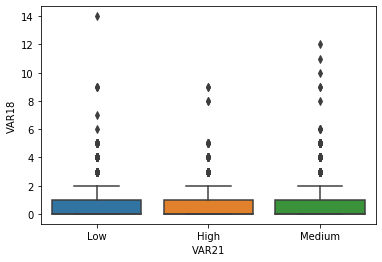

In [651]:
sns.boxplot(x="VAR21", y="VAR18", data=train)

In [ ]:
#plt.plot(train['VAR21'],train['VAR13'])

In [630]:
train['VAR14'] = train['VAR14'].replace('.',1)
#train['VAR21'] = train['VAR21'].replace({'Low','Medium','High'},(0,1,2))

In [ ]:
# train['VAR2'].fillna(train['VAR2'].median(), inplace =True)
# train['VAR3'].fillna(train['VAR3'].median(), inplace =True)
# train['VAR4'].fillna(train['VAR4'].median(), inplace =True)
# train['VAR6'].fillna(train['VAR6'].median(), inplace =True)
# train['VAR9'].fillna(train['VAR9'].median(), inplace =True)
# train['VAR10'].fillna(train['VAR10'].median(), inplace =True)
# train['VAR11'].fillna(train['VAR11'].median(), inplace =True)
# train['VAR12'].fillna(train['VAR12'].median(), inplace =True)
# train['VAR13'].fillna(train['VAR13'].median(), inplace =True)
# train['VAR15'].fillna(train['VAR15'].median(), inplace =True)
# train['VAR17'].fillna(train['VAR17'].median(), inplace =True)
# train['VAR5'].fillna(train['VAR5'].median(), inplace =True)
# train['VAR7'].fillna(train['VAR7'].median(), inplace =True)
# train['VAR16'].fillna(train['VAR16'].median(), inplace =True)
# train['VAR8'].fillna(train['VAR8'].median(), inplace =True)

In [ ]:
train.info()

In [631]:
train['VAR14']=train['VAR14'].astype(str).astype(int)
#train['VAR21']=train['VAR21'].astype(str).astype(int)

In [ ]:
# train["VARS1"] = train[["VAR13", "VAR15"]].max(axis=1)
# test["VARS1"] = test[["VAR13", "VAR15"]].max(axis=1)

In [ ]:
# train.groupby('VAR21'). mean()

In [632]:
columns = ['VAR18']
train = train.drop(columns, axis=1)
test = test.drop(columns,axis=1)

In [ ]:
#test['VARS1'] = test['VAR7'] + test['VAR8'] + test['VAR16']
#test['VARS2']= test['VAR11']+test['VAR15']
#test['VARS3']= test['VAR13']+test['VAR15']

In [ ]:
# columns = ['VAR7','VAR8','VAR11','VAR15','VAR16']
# train = train.drop(columns, axis=1)
# test = test.drop(columns, axis=1)

In [633]:
X = train.drop(['VAR21'],axis=1)
Y = train['VAR21']

In [634]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

In [637]:
model = xgb.XGBClassifier(max_depth=9,learning_rate=0.3,n_estimators=200)

In [638]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [639]:
preds = model.predict(X_test)

In [640]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, preds, labels=['Low','Medium','High'])

array([[1002, 1390,   24],
       [ 839, 2692,   69],
       [ 160,  558,   66]], dtype=int64)

In [641]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, preds)

0.5529411764705883

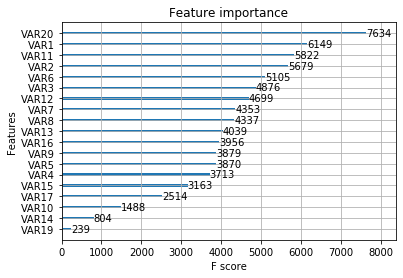

In [642]:
plot_importance(model)

In [643]:
test['VAR14'] = test['VAR14'].replace('.',1)
test['VAR14']=test['VAR14'].astype(str).astype(int)

In [644]:
prediction = model.predict(test)

In [645]:
output = pd.DataFrame()
output['VAR1'] = test['VAR1']
output['VAR21']=prediction

In [646]:
output['VAR21'] = output['VAR21'].replace((0,1,2),{'Low','Medium','High'})

In [647]:
output.to_csv(r'Neil_hanna_IITKGP_1.csv', header = None, index=False)